In [19]:
import csv
import random
from faker import Faker
from datetime import datetime

fake = Faker()

# ======================
# ENHANCED CONFIGURATION
# ======================
country_config = {
    # Americas
    "US": {
        "weight": 0.2,  # 25% of total transactions
        "currencies": ["USD"],
        "payment_rails": ["ACH", "Fedwire", "CHIPS"],
        "domestic_share": 0.95,
        "routing_code": lambda: fake.numerify("#########"),
        "banks": ["Bank of America",
    "Chase",
    "Wells Fargo",
    "Citibank",
    "US Bank",
    "Capital One",
    "PNC Bank",
    "TD Bank",
    "First Republic Bank",
    "Fifth Third Bank",
    "Regions Bank",
    "KeyBank",
    "Navy Federal Credit Union",
    "Huntington Bank",
    "Umpqua Bank",
    "Signature Bank",
    "Community Bank",
    "Republic Bank",
    "First National Bank of Omaha",
    "BMO Harris Bank",
    "SunTrust Bank",
    "Liberty Bank",
    "New York Community Bancorp",
    "First Financial Bank",
    "Great Western Bank",
    "First United Bank",
    "First Bank",
    "BankUnited",
    "Vanguard Bank",
    "Bank of the West",
    "Barclays Bank USA",
    "Royal Bank of Canada (RBC)",
    "Bank OZK",
    "American Savings Bank",
    "Commerce Bank",
    "Associated Bank",
    "Citizens Bank",
    "Fidelity Bank",
    "Provident Bank",
    "First Federal Bank of the Heartland",
    "Bank of Hawaii",
    "Heritage Bank",
    "Community Financial Bank",
    "American Express",
    "Avenues Bank",
    "First National Bank",
    "Allied Bank",
    "South Dakota Bank",
    "Alliance Bank",
    "American Express Bank",
    "First Federal Bank of Chicago",
    "First Bank of the West",
    "Community Bank",
    "Fidelity Investments",
    "BankUnited",
    "Midwest Bank"],
        "time_windows": {
            "ACH": {"hours": "00:00-23:59", "weekend": False},
            "Fedwire": {"hours": "08:30-17:00", "weekend": False}
        },
        "base_costs": {"ACH": 0.25, "Fedwire": 25.0, "CHIPS": 10.0}
    },
    
    "IN": {
        "weight": 0.20,
        "currencies": ["INR"],
        "payment_rails": ["UPI", "NEFT", "RTGS", "IMPS"],
        "domestic_share": 0.98,
        "routing_code": lambda: "IN" + fake.numerify("##########"),
        "banks": [ "State Bank of India (SBI)",
    "HDFC Bank",
    "ICICI Bank",
    "Bank of Baroda",
    "Punjab National Bank",
    "Union Bank of India",
    "Axis Bank",
    "Kotak Mahindra Bank",
    "Yes Bank",
    "IndusInd Bank",
    "Canara Bank",
    "Bank of India",
    "Indian Bank",
    "Indian Overseas Bank",
    "UCO Bank",
    "Central Bank of India",
    "Punjab and Sind Bank",
    "Bank of Maharashtra",
    "Andhra Bank",
    "Syndicate Bank",
    "IDBI Bank",
    "New Bank of India"],
        "time_windows": {
            "UPI": {"hours": "00:00-23:59", "weekend": True},
            "NEFT": {"hours": "08:00-19:00", "weekend": False}
        },
        "base_costs": {"UPI": 0.0, "NEFT": 0.5, "RTGS": 25.0}
    },
    
    "DE": {
        "weight": 0.20,
        "currencies": ["EUR"],
        "payment_rails": ["SEPA", "ELIXIR"],
        "domestic_share": 0.9,
        "routing_code": lambda: fake.swift(),
        "banks": [    "Deutsche Bank",
    "Commerzbank",
    "Postbank",
    "Sparkasse",
    "Volksbank",
    "ING",
    "DZ Bank",
    "Landesbank Baden-Württemberg",
    "Landesbank Hessen-Thüringen",
    "Deutsche Kreditbank Aktiengesellschaft",
    "N26",
    "Volkswagen Bank",
    "Santander",
    "Fidor Bank",
    "Hamburg Commercial Bank",
    "TARGOBANK",
    "UniCredit Bank AG",
    "Siemens Bank GmbH"],
        "time_windows": {
            "SEPA": {"hours": "00:00-23:59", "weekend": True},
            "ELIXIR": {"hours": "08:00-16:00", "weekend": False}
        },
        "base_costs": {"SEPA": 0.10, "ELIXIR": 1.5}
    },
    
    "UK": {
        "weight": 0.20,
        "currencies": ["GBP"],
        "payment_rails": ["DIRECT", "CHAPS"],
        "domestic_share": 0.6,
        "routing_code": lambda: fake.swift(),
        "banks": ["Barclays", "Santander UK", "Nationwide", "Royal Bank of Scotland", 
                  "Lloyds Banking Group", "NatWest", "Bank of Ireland", "Halifax", "Metro Bank", 
                  "ABC International Bank plc", "HSBC", "First Direct", "Atom Bank PLC"],
        "time_windows": {
            "DIRECT": {"hours": "00:00-23:59", "weekend": True},
            "CHAPS": {"hours": "08:00-16:00", "weekend": False}
        },
        "base_costs": {"DIRECT": 0.10, "CHAPS": 1.5}
    }
}

# Add more countries with weights summing to 1.0
additional_countries = {
    fake.country_code(): {"weight": 0.08},
    fake.country_code(): {"weight": 0.06},
    fake.country_code(): {"weight": 0.04},
    fake.country_code(): {"weight": 0.02}
}



print(additional_countries)

# Merge configs
import pycountry
for country, config in additional_countries.items():
    if country not in country_config:
        print(country)
        name_of_country = pycountry.countries.get(alpha_2=country).name
        country_config[country] = {
            **config,
            "currencies": [fake.currency_code()],
            "payment_rails": ["DOMESTIC_RAIL", "SWIFT"],
            "domestic_share": 0.85,
            "routing_code": lambda: fake.swift(),
            "banks": [f"{name_of_country} Bank", f"National {name_of_country} Bank"],
            "time_windows": {"DOMESTIC_RAIL": {"hours": "08:00-17:00", "weekend": False}},
            "base_costs": {"DOMESTIC_RAIL": 1.0}
        }

# Normalize weights
total_weight = sum(c["weight"] for c in country_config.values())
for country in country_config:
    country_config[country]["weight"] /= total_weight

# FX and Discount Config (unchanged)
fx_markup = {"USD": 0.0, "EUR": 0.005, "GBP": 0.007, "INR": 0.015}
discount_rules = [
    {"condition": "same_bank", "text": "50 cent discount", "amount": 50},
    {"condition": "high_volume", "text": "$1 off per 50 txn", "amount": 100},
    {"condition": "weekend", "text": "30% weekend discount", "amount": lambda c: c*0.3}
]

# ======================
# FIXED FUNCTIONS
# ======================
def weighted_country_choice():
    countries_codes = list(country_config.keys())
    weights = [c["weight"] for c in country_config.values()]
    return random.choices(countries_codes, weights=weights, k=1)[0]

def calculate_cost(rail, currency, is_domestic, country):
    # Get base cost (converted to cents)
    base = country_config[country]["base_costs"].get(rail, 15.0) * 100
    
    # Add international fees if needed
    if not is_domestic:
        base += 10.0 * 100  # SWIFT fee in cents
        base += fx_markup.get(currency, 0.02) * 100 * 100  # FX markup in cents
    
    # Add random variation (10-200 cents) and round to integer
    random_variation = random.randint(10, 200)
    total_cost = int(base) + random_variation
    
    return total_cost

def apply_discount(cost, country, rail, day_of_week):
    if random.random() < 0.2:
        if day_of_week >= 5:
            rule = discount_rules[2]
            discount = rule["amount"](cost)
        elif rail != "SWIFT" and random.random() < 0.3:
            rule = random.choice(discount_rules[:2])
            discount = rule["amount"]
        else:
            return cost, 0.0, ""
        return round(cost - discount), discount, rule["text"]
    return cost, 0.0, ""

# ======================
# DATA GENERATION
# ======================
def generate_record():
    country = weighted_country_choice()
    config = country_config[country]
    is_domestic = random.random() < config["domestic_share"]
    
    rail = ("SWIFT" if not is_domestic and random.random() < 0.1 
           else random.choice([r for r in config["payment_rails"] if r != "SWIFT"]))
    
    now = fake.date_time_this_year()
    time_config = config["time_windows"].get(rail, {"hours": "00:00-23:59", "weekend": True})
    
    currency = (random.choice(config["currencies"]) 
               if is_domestic 
               else random.choice(["USD", "EUR", "GBP"] + config["currencies"]))
    
    completion_time = (random.randint(3600, 86400) if rail == "SWIFT"
                     else random.randint(10, 300) if "instant" in rail
                     else random.randint(300, 3600))
    
    base_cost = calculate_cost(rail, currency, is_domestic, country)
    final_cost, discount, rule = apply_discount(base_cost, country, rail, now.weekday())
    
    return {
        "bank_partner": random.choice(config["banks"]),
        "country_code": country,
        "currency_supported": currency,
        "payment_rail": rail,
        "average_completion_time_in_seconds": completion_time,
        "number_of_failures_per_thousand_transactions": random.randint(0, 20),
        "active": random.random() > 0.15,
        "routing_code": config["routing_code"](),
        "operating_hours": time_config["hours"],
        "is_weekend": now.weekday() >= 5,
        "cost_in_us_cents": base_cost,
        "discounted_cost_in_us_cents": final_cost,
        "discount_rule": rule,
        "transaction_date": now.strftime("%Y-%m-%d %H:%M:%S")
    }

# Generate 100K records
with open('payment_rails_enhanced.csv', 'w', newline='') as f:
    writer = csv.DictWriter(f, fieldnames=generate_record().keys())
    writer.writeheader()
    for _ in range(10000):
        writer.writerow(generate_record())

{'GY': {'weight': 0.08}, 'US': {'weight': 0.06}, 'KW': {'weight': 0.04}, 'LK': {'weight': 0.02}}
GY
KW
LK


In [3]:
import pandas as pd
df = pd.read_csv('payment_rails_enhanced.csv')

# Check country distribution
print(df['country'].value_counts(normalize=True))

# Verify SWIFT percentage (should be ~10% of cross-border)
cross_border = df[df['payment_rail'] == 'SWIFT']
print(f"SWIFT %: {len(cross_border)/len(df):.2%}")

country
USA      0.2546
IND      0.1519
GER      0.1017
UK       0.0817
BRA      0.0681
JPN      0.0597
AUS      0.0520
SGP      0.0380
CAN      0.0308
CHN      0.0277
FRA      0.0260
NGR      0.0210
SAF      0.0209
MEX      0.0198
Other    0.0184
UAE      0.0174
SAU      0.0103
Name: proportion, dtype: float64
SWIFT %: 1.10%


In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

# Load data
df = pd.read_csv('payment_rails_enhanced.csv')
df = df[df['active']].copy()

# Feature engineering
X = df[['country', 'currency_supported', 'bank_partner', 'payment_rail']]
y = df['average_completion_time_in_seconds'] / 3600  # Convert to hours

# Time-series split (for LSTM)
train_size = int(0.8 * len(df))
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

# Common preprocessing for non-LSTM models
preprocessor = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(), 
         ['country', 'currency_supported', 'bank_partner', 'payment_rail']
        )
    ],
    remainder='drop'
)

X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [3]:
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

# XGBoost and Random Forest
models = {
    "XGBoost": XGBRegressor(n_estimators=200, max_depth=6, learning_rate=0.1),
    "Random Forest": RandomForestRegressor(n_estimators=200, max_depth=10)
}

# LSTM Preparation (requires sequential encoding)
tokenizer = {col: {v: i for i, v in enumerate(X[col].unique())} 
            for col in X.columns}
X_train_seq = np.column_stack([X_train[col].map(tokenizer[col]) for col in X.columns])
X_test_seq = np.column_stack([X_test[col].map(tokenizer[col]) for col in X.columns])

# Reshape for LSTM [samples, timesteps, features]
X_train_lstm = X_train_seq.reshape((X_train_seq.shape[0], 1, X_train_seq.shape[1]))
X_test_lstm = X_test_seq.reshape((X_test_seq.shape[0], 1, X_test_seq.shape[1]))

In [4]:
results = []

# 1. XGBoost and Random Forest
for name, model in models.items():
    model.fit(X_train_processed, y_train)
    y_pred = model.predict(X_test_processed)
    
    results.append({
        "Model": name,
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
        "MAE": mean_absolute_error(y_test, y_pred),
        "R2": r2_score(y_test, y_pred)
    })

# 2. LSTM Model
lstm_model = Sequential([
    LSTM(64, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
    Dense(1)
])
lstm_model.compile(optimizer='adam', loss='mse')
lstm_model.fit(X_train_lstm, y_train, epochs=10, batch_size=32, verbose=0)

y_pred_lstm = lstm_model.predict(X_test_lstm).flatten()
results.append({
    "Model": "LSTM",
    "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_lstm)),
    "MAE": mean_absolute_error(y_test, y_pred_lstm),
    "R2": r2_score(y_test, y_pred_lstm)
})

# Results comparison
results_df = pd.DataFrame(results).set_index("Model")
print(results_df.sort_values("RMSE"))

NameError: name 'mean_squared_error' is not defined

                       RMSE       MAE        R²      MAPE  Top-3 Accuracy
Model                                                                    
Random Forest      0.725361  0.285668  0.727920  0.750698             0.0
LightGBM           0.728276  0.286269  0.725729  0.751904             0.0
XGBoost            0.763791  0.288327  0.698326  0.751691             0.0
Gradient Boosting  0.766876  0.288349  0.695885  0.751531             0.0


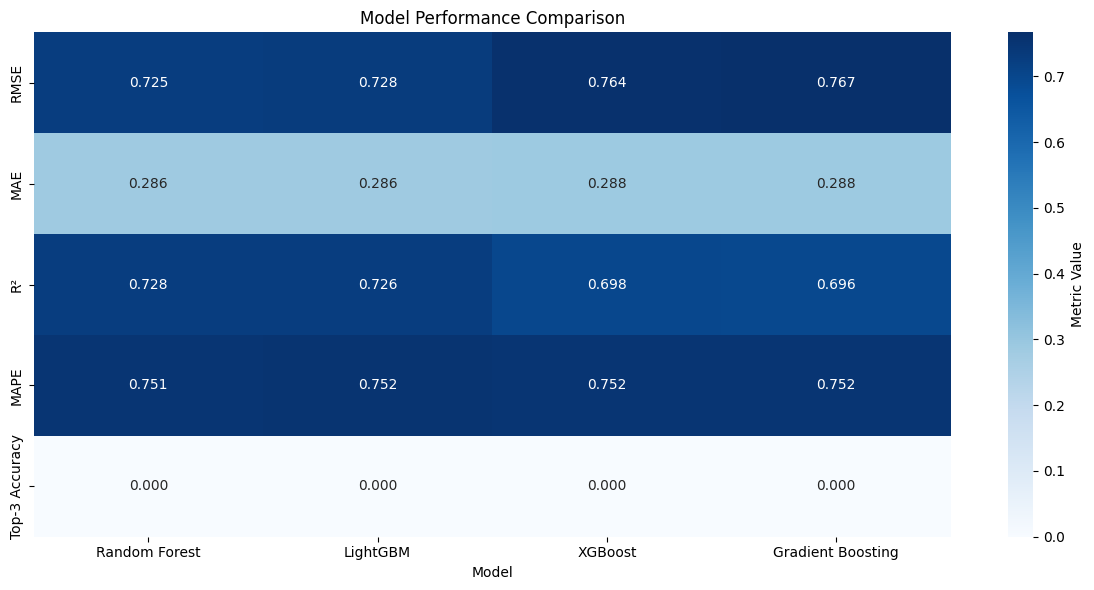

In [4]:
def top_k_accuracy(y_true, y_pred, k=3):
    """Calculate if true fastest option is in top-k predictions"""
    combined = pd.DataFrame({'true': y_true, 'pred': y_pred})
    combined['rank'] = combined['pred'].rank(method='min')
    return (combined['rank'] <= k).mean()

# Add top-k accuracy for each model
for model_name in results_df.index:
    if model_name == "LSTM":
        y_pred = lstm_model.predict(X_test_lstm).flatten()
    else:
        y_pred = models[model_name].predict(X_test_processed)
    
    results_df.loc[model_name, "Top-3 Accuracy"] = top_k_accuracy(y_test, y_pred, k=3)

print(results_df.sort_values("Top-3 Accuracy", ascending=False))

In [5]:
best_model = results_df.loc[results_df['Top-3 Accuracy'].idxmax()]
print(f"Recommended model: {best_model.name}")

Recommended model: Random Forest


In [9]:
def get_balanced_model(results_df, rmse_quantile=0.25, min_accuracy=0.7):
    """Select model with best tradeoff between RMSE and Top-3 Accuracy"""
    try:
        # Filter models meeting minimum accuracy
        qualified = results_df[results_df['Top-3 Accuracy'] >= min_accuracy]
        
        if len(qualified) == 0:
            print("No models meet accuracy threshold. Relaxing constraints...")
            qualified = results_df[results_df['Top-3 Accuracy'] >= min_accuracy - 0.1]
        
        # Find models below RMSE quantile
        rmse_threshold = qualified['RMSE'].quantile(rmse_quantile)
        balanced_models = qualified[qualified['RMSE'] <= rmse_threshold]
        
        if len(balanced_models) == 0:
            print("No models below RMSE threshold. Selecting best accuracy...")
            return qualified.loc[qualified['Top-3 Accuracy'].idxmax()]
        
        return balanced_models.loc[balanced_models['Top-3 Accuracy'].idxmax()]
    
    except Exception as e:
        print(f"Error in model selection: {e}")
        return results_df.loc[results_df['Top-3 Accuracy'].idxmax()]

# Usage
balanced_model = get_balanced_model(results_df)
print(f"Balanced Model Selection:\n{balanced_model}")

No models meet accuracy threshold. Relaxing constraints...
No models below RMSE threshold. Selecting best accuracy...
Error in model selection: attempt to get argmax of an empty sequence
Balanced Model Selection:
RMSE              0.725361
MAE               0.285668
R²                0.727920
MAPE              0.750698
Top-3 Accuracy    0.000000
Name: Random Forest, dtype: float64


In [27]:
import csv
import random
from datetime import date, timedelta

def generate_bank_data_balanced_failures(num_records=300000, start_date=date(2024, 1, 1), end_date=date(2025, 4, 24)):
    """
    Generates a CSV file with bank data, ensuring roughly equal distribution
    across three failure categories: Low (0-1), Medium (2-3), High (4-5).

    Args:
        num_records (int): The target total number of records (will be slightly more).
        start_date (date): The earliest possible business day.
        end_date (date): The latest possible business day.
    """
    country_currencies = {
        "US": "USD", "DE": "EUR", "GB": "GBP", "CA": "CAD", "AU": "AUD",
        "FR": "EUR", "JP": "JPY", "SG": "SGD", "IN": "INR", "CH": "CHF",
        "ES": "EUR", "MX": "MXN", "BR": "BRL", "ZA": "ZAR", "KR": "KRW",
        "SE": "SEK", "NO": "NOK", "DK": "DKK", "HK": "HKD", "NZ": "NZD",
        # Add more country-currency mappings as needed
    }

    payment_rails = {
        "US": ["ACH", "Wire", "Card"], "DE": ["SEPA", "Giropay", "ELV"],
        "GB": ["FPS", "Bacs", "CHAPS"], "CA": ["Lynx", "ACSS", "Interac"],
        "AU": ["BECS", "BPAY", "NPP"], "FR": ["SEPA", "Carte Bancaire", "Virement"],
        "JP": ["Zengin", "Anser", "J-Debit"], "SG": ["FAST", "GIRO", "PayNow"],
        "IN": ["UPI", "IMPS", "NEFT", "RTGS"], "CH": ["SIC", "SEPA", "EZS"],
        "ES": ["SEPA", "Iberpay", "Bizum"], "MX": ["SPEI", "Banxico"],
        "BR": ["Pix", "Boleto", "TED"], "ZA": ["EFT", "Card"],
        "KR": ["Wire Transfer", "Card"], "SE": ["Swish", "Bankgiro"],
        "NO": ["Vipps", "Bankoverforing"], "DK": ["MobilePay", "Nets"],
        "HK": ["FPS", "CHATS"], "NZ": ["Direct Credit", "EFTPOS"],
        # Add more payment rails for each country
    }

    bank_partners = [
        "GlobalPay Inc", "Alpha Bank", "SwiftPay Ltd", "Nova Payments",
        "Prime Financial", "SecureTrans", "United Commerce", "Fast Funds",
        "EuroConnect", "TrustLink", "Apex Payments", "Beta Finance",
        "QuickSend", "CanAm Exchange", "Down Under Pay", "FrancePay",
        "Nippon Transfer", "Lion City Bank", "Iberia Payments", "SwissTransact",
        "Bharat Payments", "Deutsche Zahlungen", "London Finance", "Toronto Exchange",
        "Banco Latino", "Afrique Payments", "Seoul Finance", "Stockholm Transfer",
        "Oslo Commerce", "Copenhagen Funds", "Hong Kong Payments", "Aotearoa Bank"
        # Add more bank partners
    ]

    records_list_low = []
    records_list_medium = []
    records_list_high = []

    def get_random_business_day(start, end):
        """Returns a random weekday (Monday to Friday) within the date range."""
        delta = end - start
        int_delta = delta.days
        day = random.randint(0, int_delta)
        random_date = start + timedelta(days=day)
        while random_date.weekday() >= 5:  # Skip weekends (Saturday=5, Sunday=6)
            random_date += timedelta(days=1)
        return random_date

    target_per_category = num_records // 3
    generated_low = 0
    generated_medium = 0
    generated_high = 0

    while generated_low < target_per_category or generated_medium < target_per_category or generated_high < target_per_category:
        country_code = random.choice(list(country_currencies.keys()))
        currency_supported = country_currencies[country_code]
        payment_rail = random.choice(payment_rails.get(country_code, ["Unknown"]))
        bank_partner = random.choice(bank_partners)
        avg_completion_time = random.randint(1, 300)  # Seconds
        business_day = get_random_business_day(start_date, end_date)
        business_day_str = business_day.isoformat()

        record_base = [bank_partner, country_code, currency_supported, payment_rail, avg_completion_time, business_day_str]

        # Generate records for Low failure category (0-10)
        if generated_low < target_per_category:
            num_failures = random.randint(0, 10)
            records_list_low.append(record_base + [num_failures])
            generated_low += 1

        # Generate records for Medium failure category (20-50)
        if generated_medium < target_per_category:
            num_failures = random.randint(20, 50)
            records_list_medium.append(record_base + [num_failures])
            generated_medium += 1

        # Generate records for High failure category (50-100)
        if generated_high < target_per_category:
            num_failures = random.randint(50, 100)
            records_list_high.append(record_base + [num_failures])
            generated_high += 1

    all_records = records_list_low + records_list_medium + records_list_high
    random.shuffle(all_records)

    filename = "bank_transactions_data_1.csv"
    with open(filename, 'w', newline='') as csvfile:
        fieldnames = ['bank_partner', 'country_code', 'currency_supported', 'payment_rail', 'avergae_completion_time_in_seconds', 'business_day', 'number_of_failures']
        writer = csv.writer(csvfile)

        writer.writerow(fieldnames)
        writer.writerows(all_records)

    print(f"Generated {len(all_records)} records in {filename} with roughly equal failure distribution.")

if __name__ == "__main__":
    generate_bank_data_balanced_failures(num_records=100000)

Generated 99999 records in bank_transactions_data_1.csv with roughly equal failure distribution.


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

def load_and_prepare_data(csv_file):
    """Loads the CSV data into a Pandas DataFrame."""
    try:
        df = pd.read_csv(csv_file)
        return df
    except FileNotFoundError:
        print(f"Error: File not found at {csv_file}")
        return None

def train_completion_time_predictor(df):
    """Trains a regression model to predict average completion time."""
    if df is None:
        return None

    # Encode categorical features
    label_encoders = {}
    for column in ['bank_partner', 'country_code', 'currency_supported', 'payment_rail']:
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le

    X = df[['bank_partner', 'country_code', 'currency_supported', 'payment_rail']]
    y = df['avergae_completion_time_in_seconds']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = RandomForestRegressor(random_state=42)
    model.fit(X_train, y_train)

    return model, label_encoders

def recommend_fastest_bank_ml(model, encoders, all_data_df, country_code, currency_supported):
    """Recommends the fastest bank partner using the trained ML model (addressing feature name warning)."""
    if model is None or encoders is None or all_data_df is None:
        return "Model not trained or data unavailable."

    relevant_data = all_data_df[(all_data_df['country_code'] == country_code) & (all_data_df['currency_supported'] == currency_supported)]
    if relevant_data.empty:
        return f"No data available for {country_code} with currency {currency_supported}."

    unique_banks = relevant_data['bank_partner'].unique()
    unique_rails = relevant_data['payment_rail'].unique()

    predictions = []
    for bank in unique_banks:
        for rail in unique_rails:
            try:
                # Encode input features
                encoded_bank = encoders['bank_partner'].transform([bank])[0]
                encoded_country = encoders['country_code'].transform([country_code])[0]
                encoded_currency = encoders['currency_supported'].transform([currency_supported])[0]
                encoded_rail = encoders['payment_rail'].transform([rail])[0]

                # Create a DataFrame with feature names
                prediction_input = pd.DataFrame({
                    'bank_partner': [encoded_bank],
                    'country_code': [encoded_country],
                    'currency_supported': [encoded_currency],
                    'payment_rail': [encoded_rail]
                })

                predicted_time = model.predict(prediction_input)[0]
                predictions.append({'bank_partner': bank, 'payment_rail': rail, 'predicted_time': predicted_time})
            except ValueError:
                pass

    if not predictions:
        return f"Could not predict completion time for any bank/rail for {country_code} ({currency_supported})."

    predictions_df = pd.DataFrame(predictions)
    fastest_prediction = predictions_df.sort_values(by='predicted_time').iloc[0]

    return f"The predicted fastest bank partner for {country_code} ({currency_supported}) is: {fastest_prediction['bank_partner']} (via {fastest_prediction['payment_rail']}, Predicted Time: {fastest_prediction['predicted_time']:.2f} seconds)"
if __name__ == "__main__":
    csv_file = "bank_transactions_data.csv"  # Replace with your CSV file
    bank_data_df = load_and_prepare_data(csv_file)

    if bank_data_df is not None:
        completion_time_model, encoders = train_completion_time_predictor(bank_data_df.copy()) # Use a copy to avoid modifying original

        if completion_time_model and encoders:
            country_input = "US"
            currency_input = "USD"
            recommendation = recommend_fastest_bank_ml(completion_time_model, encoders, bank_data_df, country_input, currency_input)
            print(recommendation)

            country_input = "DE"
            currency_input = "EUR"
            recommendation = recommend_fastest_bank_ml(completion_time_model, encoders, bank_data_df, country_input, currency_input)
            print(recommendation)

            country_input = "IN"
            currency_input = "INR"
            recommendation = recommend_fastest_bank_ml(completion_time_model, encoders, bank_data_df, country_input, currency_input)
            print(recommendation)

            country_input = "GB"
            currency_input = "JPY" # Example
            recommendation = recommend_fastest_bank_ml(completion_time_model, encoders, bank_data_df, country_input, currency_input)
            print(recommendation)

The predicted fastest bank partner for US (USD) is: Lion City Bank (via Wire, Predicted Time: 116.57 seconds)
The predicted fastest bank partner for DE (EUR) is: Banco Latino (via ELV, Predicted Time: 122.78 seconds)
The predicted fastest bank partner for IN (INR) is: SecureTrans (via NEFT, Predicted Time: 111.99 seconds)
No data available for GB with currency JPY.


In [3]:

import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import pickle
from flask import Flask, request, jsonify

# --- 1. Train and Save the Model and Encoders (Run this once) ---
# def train_and_save_model(csv_file="bank_transactions_data.csv", model_path="fastest_bank_model.pkl", encoder_path="fastest_bank_encoders.pkl"):
#     try:
#         df = pd.read_csv(csv_file)
#     except FileNotFoundError:
#         print(f"Error: File not found at {csv_file}")
#         return

#     label_encoders = {}
#     for column in ['bank_partner', 'country_code', 'currency_supported', 'payment_rail']:
#         le = LabelEncoder()
#         df[column] = le.fit_transform(df[column])
#         label_encoders[column] = le

#     X = df[['bank_partner', 'country_code', 'currency_supported', 'payment_rail']]
#     y = df['avergae_completion_time_in_seconds']
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#     model = RandomForestRegressor(n_estimators=100, random_state=42)
#     model.fit(X_train, y_train)

#     # Save the model
#     with open(model_path, 'wb') as file:
#         pickle.dump(model, file)

#     # Save the encoders
#     with open(encoder_path, 'wb') as file:
#         pickle.dump(label_encoders, file)

#     print(f"Model saved to {model_path}")
#     print(f"Encoders saved to {encoder_path}")

# --- 2. Flask Application ---
app = Flask(__name__)

# Load the model and encoders when the app starts
MODEL_PATH = "fastest_bank_model.pkl"
ENCODER_PATH = "fastest_bank_encoders.pkl"
model = None
encoders = None
all_data_df = None # We'll need the original data for lookups

try:
    with open(MODEL_PATH, 'rb') as file:
        model = pickle.load(file)
    with open(ENCODER_PATH, 'rb') as file:
        encoders = pickle.load(file)
    all_data_df = pd.read_csv("bank_transactions_data.csv") # Load the full data
    print("Model and encoders loaded successfully.")
except FileNotFoundError:
    print("Error: Model or encoder file not found. Please run the training function first.")
    model_loaded = False
else:
    model_loaded = True

@app.route('/predict_fastest_bank', methods=['POST'])
def predict_fastest():
    if not model_loaded:
        return jsonify({"error": "Model not loaded."}), 500

    data = request.get_json()
    if not data or 'country_code' not in data or 'currency_supported' not in data:
        return jsonify({"error": "Please provide 'country_code' and 'currency_supported' in the request body."}), 400

    country_code = data['country_code'].upper()
    currency_supported = data['currency_supported'].upper()

    relevant_data = all_data_df[(all_data_df['country_code'] == country_code) & (all_data_df['currency_supported'] == currency_supported)]
    if relevant_data.empty:
        return jsonify({"prediction": f"No data available for {country_code} with currency {currency_supported}."})

    unique_banks = relevant_data['bank_partner'].unique()
    unique_rails = relevant_data['payment_rail'].unique()

    predictions = []
    for bank in unique_banks:
        for rail in unique_rails:
            try:
                encoded_bank = encoders['bank_partner'].transform([bank])[0]
                encoded_country = encoders['country_code'].transform([country_code])[0]
                encoded_currency = encoders['currency_supported'].transform([currency_supported])[0]
                encoded_rail = encoders['payment_rail'].transform([rail])[0]

                prediction_input = pd.DataFrame({
                    'bank_partner': [encoded_bank],
                    'country_code': [encoded_country],
                    'currency_supported': [encoded_currency],
                    'payment_rail': [encoded_rail]
                })

                predicted_time = model.predict(prediction_input)[0]
                predictions.append({'bank_partner': bank, 'payment_rail': rail, 'predicted_time': predicted_time})
            except ValueError:
                pass

    if not predictions:
        return jsonify({"prediction": f"Could not predict completion time for any bank/rail for {country_code} ({currency_supported})."})

    predictions_df = pd.DataFrame(predictions)
    fastest_prediction = predictions_df.sort_values(by='predicted_time').iloc[0]

    result = {
        "fastest_bank_partner": fastest_prediction['bank_partner'],
        "payment_rail": fastest_prediction['payment_rail'],
        "predicted_average_completion_time_seconds": round(fastest_prediction['predicted_time'], 2)
    }

    return jsonify(result)

if __name__ == '__main__':
    # Train and save the model (run this only once initially)
    # train_and_save_model()

    # Run the Flask application
    app.run(debug=True, host='0.0.0.0', use_reloader=False) # Accessible from any IP on your network

Model and encoders loaded successfully.
 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://192.168.1.2:5000
Press CTRL+C to quit
192.168.1.2 - - [24/Apr/2025 14:26:23] "GET / HTTP/1.1" 404 -
192.168.1.2 - - [24/Apr/2025 14:26:23] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [24/Apr/2025 14:27:49] "POST /predict_fastest_bank HTTP/1.1" 200 -
192.168.1.2 - - [24/Apr/2025 14:30:19] "GET / HTTP/1.1" 404 -


In [2]:
%tb

SystemExit: 1

In [6]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pickle
from flask import Flask, request, jsonify

# --- 1. Train and Save the XGBoost Model (Run this once) ---
def train_and_save_xgb_model(csv_file="bank_transactions_data.csv", model_path="fastest_bank_xgb_model.pkl"):
    try:
        df = pd.read_csv(csv_file)
    except FileNotFoundError:
        print(f"Error: File not found at {csv_file}")
        return

    categorical_features = ['bank_partner', 'country_code', 'currency_supported', 'payment_rail']

    preprocessor = ColumnTransformer(
        transformers=[
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)])

    xgb_regressor = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('regressor', xgb_regressor)])

    X = df.drop('avergae_completion_time_in_seconds', axis=1)
    y = df['avergae_completion_time_in_seconds']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    pipeline.fit(X_train, y_train)

    # Save the model pipeline
    with open(model_path, 'wb') as file:
        pickle.dump(pipeline, file)

    print(f"XGBoost model pipeline saved to {model_path}")
    
# --- 2. Flask Application with XGBoost Loading ---
app = Flask(__name__)

MODEL_PATH = "fastest_bank_xgb_model.pkl"
model_pipeline = None
all_data_df = None

try:
    with open(MODEL_PATH, 'rb') as file:
        model_pipeline = pickle.load(file)
    all_data_df = pd.read_csv("bank_transactions_data.csv")
    print("XGBoost model pipeline loaded successfully.")
except FileNotFoundError:
    print("Error: XGBoost model file not found. Please run the training function first.")
    model_loaded = False
else:
    model_loaded = True

@app.route('/predict_fastest_bank', methods=['POST'])
def predict_fastest():
    if not model_loaded:
        return jsonify({"error": "Model not loaded."}), 500

    data = request.get_json()
    if not data or 'country_code' not in data or 'currency_supported' not in data:
        return jsonify({"error": "Please provide 'country_code' and 'currency_supported' in the request body."}), 400

    country_code = data['country_code'].upper()
    currency_supported = data['currency_supported'].upper()

    relevant_data = all_data_df[(all_data_df['country_code'] == country_code) & (all_data_df['currency_supported'] == currency_supported)]
    if relevant_data.empty:
        return jsonify({"prediction": f"No data available for {country_code} with currency {currency_supported}."})

    unique_banks = relevant_data['bank_partner'].unique()
    unique_rails = relevant_data['payment_rail'].unique()

    predictions = []
    for bank in unique_banks:
        for rail in unique_rails:
            input_data = pd.DataFrame({
                'bank_partner': [bank],
                'country_code': [country_code],
                'currency_supported': [currency_supported],
                'payment_rail': [rail]
            })
            predicted_time_np = model_pipeline.predict(input_data)[0]
            predicted_time_float = float(predicted_time_np)  # Convert to standard Python float
            predictions.append({'bank_partner': bank, 'payment_rail': rail, 'predicted_time': predicted_time_float})

    if not predictions:
        return jsonify({"prediction": f"Could not predict completion time for any bank/rail for {country_code} ({currency_supported})."})

    predictions_df = pd.DataFrame(predictions)
    fastest_prediction = predictions_df.sort_values(by='predicted_time').iloc[0]

    result = {
        "fastest_bank_partner": fastest_prediction['bank_partner'],
        "payment_rail": fastest_prediction['payment_rail'],
        "predicted_average_completion_time_seconds": round(fastest_prediction['predicted_time'], 2)
    }

    return jsonify(result)

if __name__ == '__main__':
    # Train and save the XGBoost model (run this only once initially)
    # train_and_save_xgb_model()

    # Run the Flask application
    app.run(debug=True, host='0.0.0.0', use_reloader=False)

XGBoost model pipeline loaded successfully.
 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://192.168.1.2:5000
Press CTRL+C to quit
127.0.0.1 - - [24/Apr/2025 14:37:44] "POST /predict_fastest_bank HTTP/1.1" 200 -
127.0.0.1 - - [24/Apr/2025 14:38:12] "POST /predict_fastest_bank HTTP/1.1" 200 -


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

def evaluate_model(model, X_test, y_test, model_name):
    """Evaluates a regression model and prints the metrics."""
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Metrics for {model_name}:")
    print(f"  Mean Squared Error (MSE): {mse:.4f}")
    print(f"  Mean Absolute Error (MAE): {mae:.4f}")
    print(f"  R-squared (R2): {r2:.4f}")
    print("-" * 30)
    return mse, mae, r2

def train_and_evaluate(df):
    """Trains and evaluates RandomForest and XGBoost regressors."""
    categorical_features = ['bank_partner', 'country_code', 'currency_supported', 'payment_rail']

    preprocessor = ColumnTransformer(
        transformers=[
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)])

    X = df.drop('avergae_completion_time_in_seconds', axis=1)
    y = df['avergae_completion_time_in_seconds']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # --- Train and Evaluate RandomForest ---
    rf_model = Pipeline(steps=[('preprocessor', preprocessor),
                               ('regressor', RandomForestRegressor(random_state=42))])
    rf_model.fit(X_train, y_train)
    evaluate_model(rf_model, X_test, y_test, "RandomForestRegressor")

    # --- Train and Evaluate XGBoost ---
    xgb_model = Pipeline(steps=[('preprocessor', preprocessor),
                                ('regressor', xgb.XGBRegressor(objective='reg:squarederror', random_state=42))])
    xgb_model.fit(X_train, y_train)
    evaluate_model(xgb_model, X_test, y_test, "XGBoostRegressor")

if __name__ == "__main__":
    # Load your data
    csv_file = "bank_transactions_data.csv"  # Replace with your actual file
    try:
        df = pd.read_csv(csv_file)
        train_and_evaluate(df)
    except FileNotFoundError:
        print(f"Error: File not found at {csv_file}")

Metrics for RandomForestRegressor:
  Mean Squared Error (MSE): 7596.8546
  Mean Absolute Error (MAE): 75.2024
  R-squared (R2): -0.0188
------------------------------
Metrics for XGBoostRegressor:
  Mean Squared Error (MSE): 7505.5476
  Mean Absolute Error (MAE): 74.8902
  R-squared (R2): -0.0065
------------------------------


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

def create_reliability_category(df):
    """Creates a categorical reliability column based on number_of_failures."""
    if 0 <= df['number_of_failures'] <= 10:
        return 'Highly Reliable'
    elif 2 <= df['number_of_failures'] <= 50:
        return 'Moderately Reliable'
    elif 4 <= df['number_of_failures'] <= 51:
        return 'Not Reliable'
    return None

def train_and_evaluate_classifier(df):
    """Trains and evaluates RandomForest and XGBoost classifiers for reliability prediction."""
    df['reliability'] = df.apply(create_reliability_category, axis=1)
    df.dropna(subset=['reliability'], inplace=True) # Remove rows where category couldn't be assigned

    categorical_features = ['bank_partner', 'country_code', 'currency_supported', 'payment_rail']

    preprocessor = ColumnTransformer(
        transformers=[
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)])

    X = df.drop(['number_of_failures', 'reliability'], axis=1)
    y_labels = df['reliability']

    # Encode the string labels to numerical labels
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y_labels)

    X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded) # Stratify with encoded labels

    # --- Train and Evaluate RandomForest Classifier ---
    rf_classifier = Pipeline(steps=[('preprocessor', preprocessor),
                                     ('classifier', RandomForestClassifier(random_state=42))])
    rf_classifier.fit(X_train, y_train)
    y_pred_rf = rf_classifier.predict(X_test)
    y_pred_rf_labels = label_encoder.inverse_transform(y_pred_rf) # Decode for reporting

    print("--- RandomForest Classifier ---")
    print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
    print("Classification Report:\n", classification_report(label_encoder.inverse_transform(y_test), y_pred_rf_labels))
    print("Confusion Matrix:\n", confusion_matrix(label_encoder.inverse_transform(y_test), y_pred_rf_labels, labels=label_encoder.classes_))
    print("-" * 30)

    # --- Train and Evaluate XGBoost Classifier ---
    xgb_classifier = Pipeline(steps=[('preprocessor', preprocessor),
                                      ('classifier', xgb.XGBClassifier(objective='multi:softmax', num_class=len(label_encoder.classes_), random_state=42))])
    xgb_classifier.fit(X_train, y_train)
    y_pred_xgb = xgb_classifier.predict(X_test)
    y_pred_xgb_labels = label_encoder.inverse_transform(y_pred_xgb) # Decode for reporting

    print("--- XGBoost Classifier ---")
    print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")
    print("Classification Report:\n", classification_report(label_encoder.inverse_transform(y_test), y_pred_xgb_labels))
    print("Confusion Matrix:\n", confusion_matrix(label_encoder.inverse_transform(y_test), y_pred_xgb_labels, labels=label_encoder.classes_))
    print("-" * 30)

if __name__ == "__main__":
    # Load your data
    csv_file = "bank_transactions_data.csv"  # Replace with your actual file
    try:
        df = pd.read_csv(csv_file)
        train_and_evaluate_classifier(df.copy()) # Use a copy to avoid modifying original
    except FileNotFoundError:
        print(f"Error: File not found at {csv_file}")

--- RandomForest Classifier ---
Accuracy: 0.3797


D:\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:
                      precision    recall  f1-score   support

    Highly Reliable       0.36      0.33      0.35      6667
Moderately Reliable       0.39      0.43      0.41      6797
       Not Reliable       0.00      0.00      0.00       127

           accuracy                           0.38     13591
          macro avg       0.25      0.26      0.25     13591
       weighted avg       0.37      0.38      0.38     13591

Confusion Matrix:
 [[2215 4452    0]
 [3852 2945    0]
 [  59   68    0]]
------------------------------
--- XGBoost Classifier ---
Accuracy: 0.3938


D:\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:
                      precision    recall  f1-score   support

    Highly Reliable       0.36      0.29      0.32      6667
Moderately Reliable       0.42      0.50      0.46      6797
       Not Reliable       0.00      0.00      0.00       127

           accuracy                           0.39     13591
          macro avg       0.26      0.26      0.26     13591
       weighted avg       0.38      0.39      0.39     13591

Confusion Matrix:
 [[1921 4746    0]
 [3366 3431    0]
 [  52   75    0]]
------------------------------


D:\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
